In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [201]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [203]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [204]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [205]:
df['Year']=df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df.dtypes



Name         object
Year          int32
Duration      int32
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [206]:
top_generes = df['Genre'].value_counts(ascending=False).head(10)
top_directors= df['Director'].value_counts(ascending=False).head(10)

In [207]:
df=pd.get_dummies(df, columns=['Genre', 'Director'], drop_first=True)
df

,Name,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,"Genre_Action, Adventure","Genre_Action, Adventure, Biography",...,Director_Zaid Ali Khan,Director_Zaigham Ali Syed,Director_Zaigham Imam,Director_Zanane Rajsingh,Director_Zeishan Quadri,Director_Zia Sarhadi,Director_Ziaullah Khan,Director_Zoya Akhtar,Director_Zubair Khan,Director_Zunaid Memon
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Rasika Dugal,Vivek Ghamande,Arvind Jangid,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110,4.4,35,Prateik,Ishita Raj,Siddhant Kapoor,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005,142,7.4,1086,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012,82,5.6,326,Yash Dave,Muntazir Ahmad,Kiran Bhatia,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,6.1,408,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,Zubeidaa,2001,153,6.2,1496,Karisma Kapoor,Rekha,Manoj Bajpayee,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,1989,125,5.8,44,Chiranjeevi,Jayamalini,Rajinikanth,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,1999,129,4.5,655,Akshay Kumar,Twinkle Khanna,Aruna Irani,False,False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
df['Duration']=df['Duration'].fillna(df['Duration'].mean())
df['Year']=df['Year'].fillna(df['Year'].mean())
df['Votes']=df['Votes'].fillna(df['Votes'].mean())
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
df

,Name,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,"Genre_Action, Adventure","Genre_Action, Adventure, Biography",...,Director_Zaid Ali Khan,Director_Zaigham Ali Syed,Director_Zaigham Imam,Director_Zanane Rajsingh,Director_Zeishan Quadri,Director_Zia Sarhadi,Director_Ziaullah Khan,Director_Zoya Akhtar,Director_Zubair Khan,Director_Zunaid Memon
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Rasika Dugal,Vivek Ghamande,Arvind Jangid,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019,110,4.4,35,Prateik,Ishita Raj,Siddhant Kapoor,False,False,...,False,False,False,False,False,False,False,False,False,False
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,False,False,...,False,False,False,False,False,False,False,False,False,False
6,...Yahaan,2005,142,7.4,1086,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,False,False,...,False,False,False,False,False,False,False,False,False,False
8,?: A Question Mark,2012,82,5.6,326,Yash Dave,Muntazir Ahmad,Kiran Bhatia,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,6.1,408,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,Zubeidaa,2001,153,6.2,1496,Karisma Kapoor,Rekha,Manoj Bajpayee,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,1989,125,5.8,44,Chiranjeevi,Jayamalini,Rajinikanth,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,1999,129,4.5,655,Akshay Kumar,Twinkle Khanna,Aruna Irani,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\Lakshya Arora\AppData\Local\Temp\ipykernel_17728\4194741444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


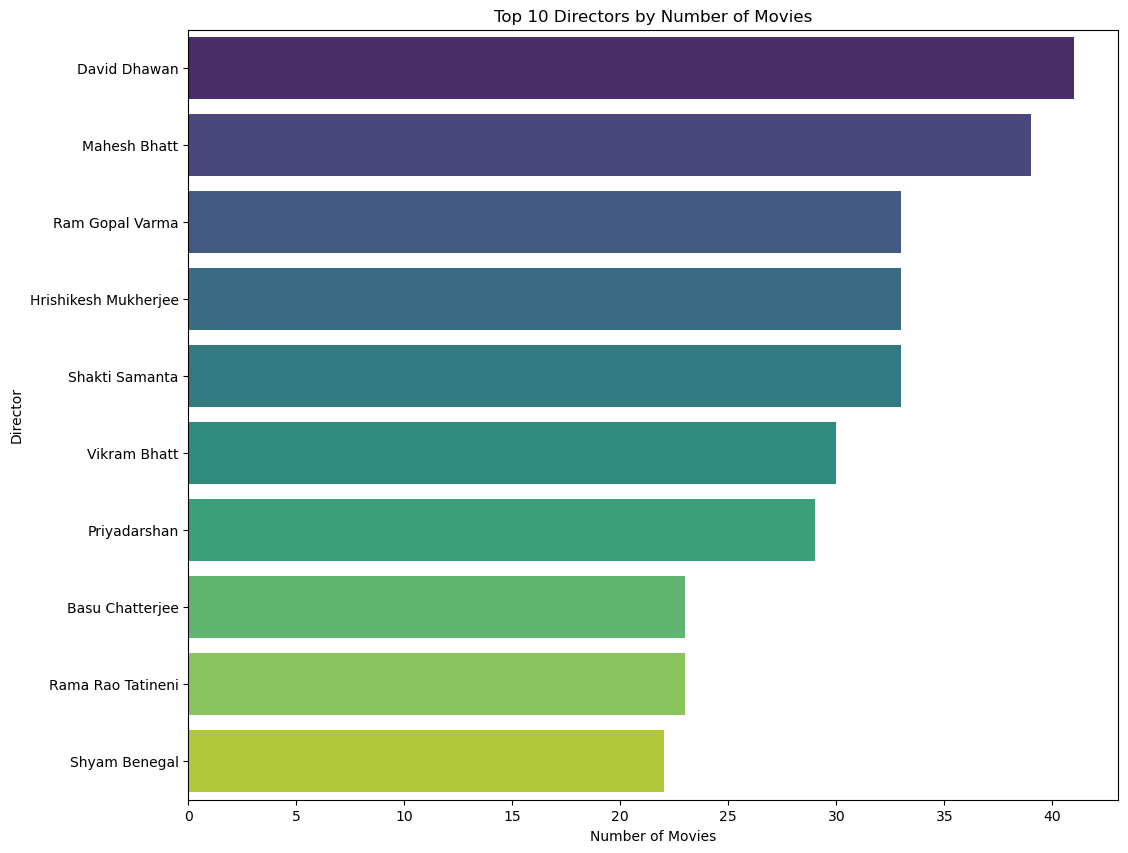

In [209]:
#top_directors= df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(12, 10))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title("Top 10 Directors by Number of Movies")
plt.ylabel("Director")
plt.xlabel("Number of Movies")
plt.show()


C:\Users\Lakshya Arora\AppData\Local\Temp\ipykernel_17728\2413360420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_generes.values, y=top_generes.index, palette='viridis')


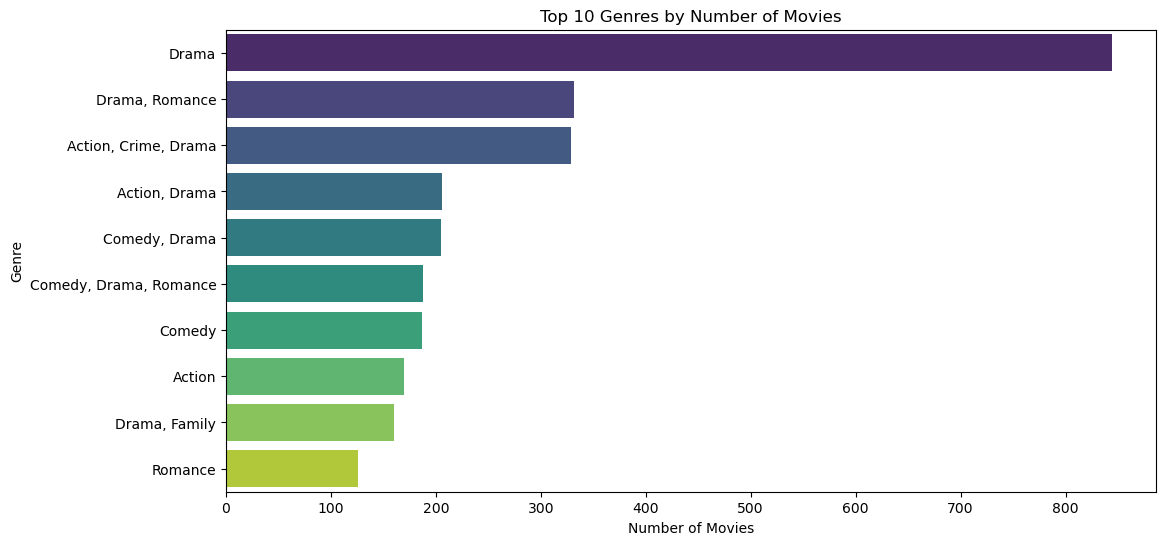

In [210]:
#top_generes = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_generes.values, y=top_generes.index, palette='viridis')
plt.title("Top 10 Genres by Number of Movies")
plt.ylabel("Genre")
plt.xlabel("Number of Movies")  
plt.show()

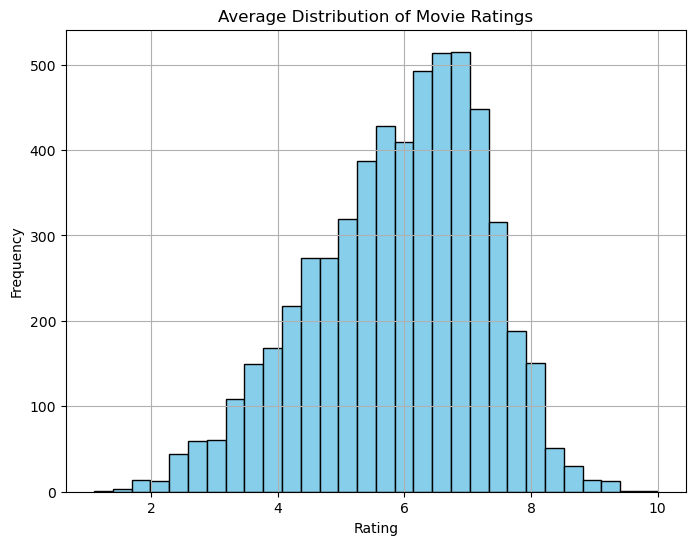

In [216]:
plt.figure(figsize=(8, 6))
df['Rating'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title("Average Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

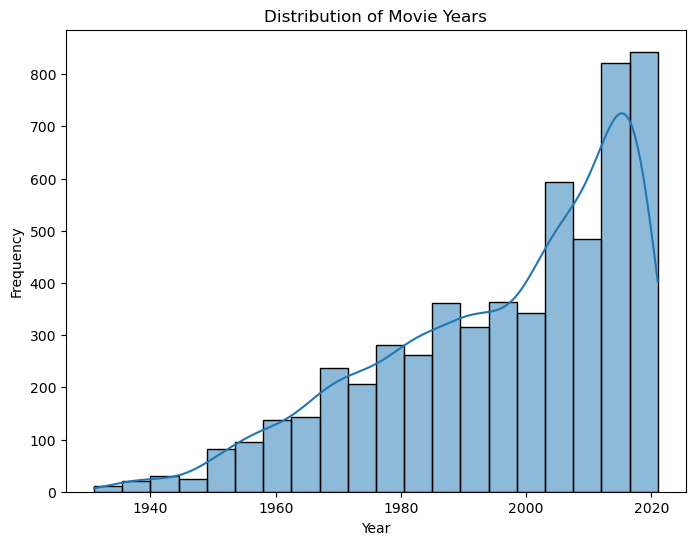

In [212]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title("Distribution of Movie Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

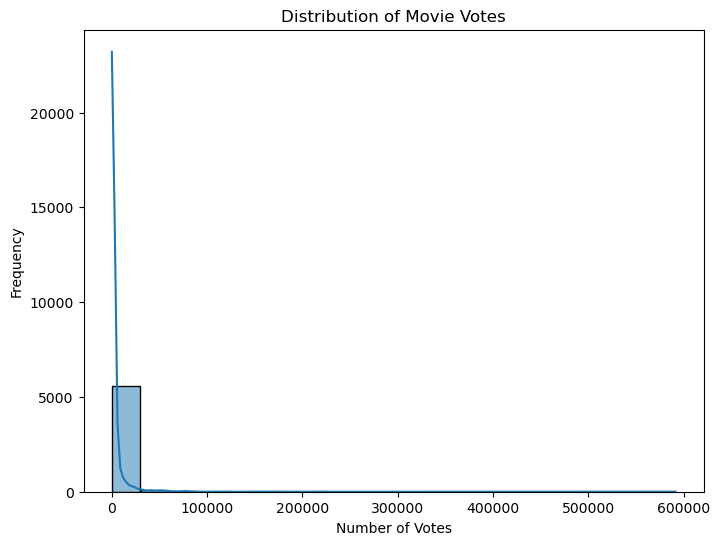

In [213]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Votes'], bins=20, kde=True)
plt.title("Distribution of Movie Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

C:\Users\Lakshya Arora\AppData\Local\Temp\ipykernel_17728\791190665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


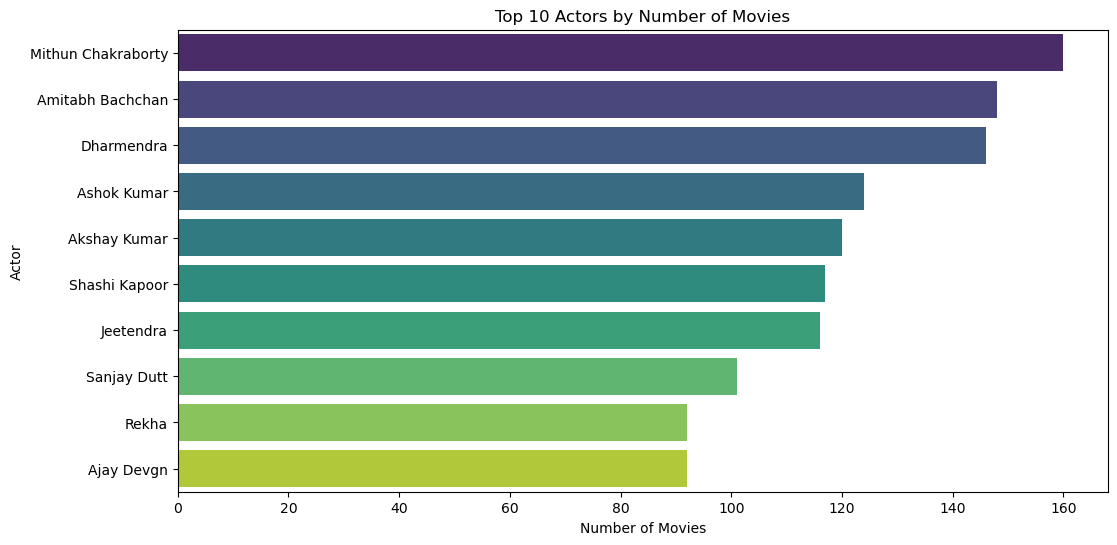

In [214]:
top_actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']]).value_counts(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title("Top 10 Actors by Number of Movies")
plt.ylabel("Actor")
plt.xlabel("Number of Movies")
plt.show()

In [ ]:
high_rate=df[df['Rating']>8.5]
rate_count=high_rate['Rating'].value_counts().reset_index()

,Name,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,"Genre_Action, Adventure","Genre_Action, Adventure, Biography",...,Director_Zaid Ali Khan,Director_Zaigham Ali Syed,Director_Zaigham Imam,Director_Zanane Rajsingh,Director_Zeishan Quadri,Director_Zia Sarhadi,Director_Ziaullah Khan,Director_Zoya Akhtar,Director_Zubair Khan,Director_Zunaid Memon
967,An Insignificant Man,2016,96,8.7,1928,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj,False,False,...,False,False,False,False,False,False,False,False,False,False
1314,Ashok Vatika,2018,97,9.3,7,Kunj Anand,Sanjay Bishnoi,Paras Zutshi,False,False,...,False,False,False,False,False,False,False,False,False,False
1341,Atal Faisla,2018,127,8.8,5,Sahil Akhtar,Himayat Ali,Aman Jain,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,Awasaan,2020,101,8.7,21,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain,False,False,...,False,False,False,False,False,False,False,False,False,False
1469,B for Bundelkhand,2017,117,8.8,5,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi,False,False,...,False,False,False,False,False,False,False,False,False,False
1709,Bahattar Hoorain,2019,120,8.8,23,Narottam Bain,Aamir Bashir,Pawan Malhotra,False,False,...,False,False,False,False,False,False,False,False,False,False
1729,Baikunth,2021,72,9.3,29,Vishwa Bhanu,Sangam Shukla,Vijay Thakur,False,False,...,False,False,False,False,False,False,False,False,False,False
2093,Bhagwan Parshuram,1970,136,8.7,10,Niranjan Sharma,Shalini,Trilok Kapoor,False,False,...,False,False,False,False,False,False,False,False,False,False
2437,Black Rose,2020,120,8.6,38,Samiksha Bhatnagar,Rahul Chawla,Abhilash Dada,False,False,...,False,False,False,False,False,False,False,False,False,False
2709,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,134,8.6,656,Harman Baweja,Pawan Kalra,Om Puri,False,False,...,False,False,False,False,False,False,False,False,False,False


In [215]:
X = df.drop(['Rating'], axis=1)  # Features
y = df['Rating']  # Target
